### Chapter 11 - Bayesian Inference Example 11.3, 11.4
Let $X_1,...X_n \sim Bernoulli(p)$ and $f(p) = 1$ so that $p|X_1,...,X_n \sim Beta(s+1, n-s+1)$ with $s = \sum_{i=1}^{n} x_i $. Let $\psi = log(p/(1-p))$. Find the posterior density of $\Psi|X_1,...,X_n$.

The problem can be solved analytically or by simulation.

In [3]:
set.seed(7011)
n <- 100
p <- 0.6
x <- rbinom(n, size = 1, prob = p)
s <- sum(x)

#### 1. Analytical Approach

Let $H(\psi|x_1,..,x_n)$ be the cumulative density function of $\Psi|x_1,..,x_n.$ <br><br>
$H(\psi|x_1,...,x_n) = \Pr(\Psi \leq \psi|x_1,...,x_n) = \frac{\Gamma(n+2)}{\Gamma(s+1)\Gamma(n-s+1)} \int_{0}^{e^{\psi}/(1+e^{\psi})} p^s (1-p)^{n-s}dp $ <br><br>
Let $h(\psi|x_1,..,x_n)$ be the probability density function of $\Psi|x_1,..,x_n.$ <br><br>
$h(\psi|x_1,...,x_n) = H'(\psi|x_1,...,x_n) = \frac{\Gamma(n+2)}{\Gamma(s+1)\Gamma(n-s+1)}(\frac{e^\psi}{1+e^\psi})^{s}(\frac{1}{1+e^\psi})^{n-s+2}$ <br><br>
for $ \psi \in \mathbb{R}$

In [8]:
psi_pdf <- function(psi) {
    mult <- gamma(n+2)/(gamma(s+1)*gamma(n-s+1))
    a <- exp(psi) / (1 + exp(psi))
    b <- 1 / (1 + exp(psi))
    return (mult * (a^s) * (b^(n-s+2)))
}

In [28]:
pdf <- psi_pdf(seq(-0, 1.5, 0.01))

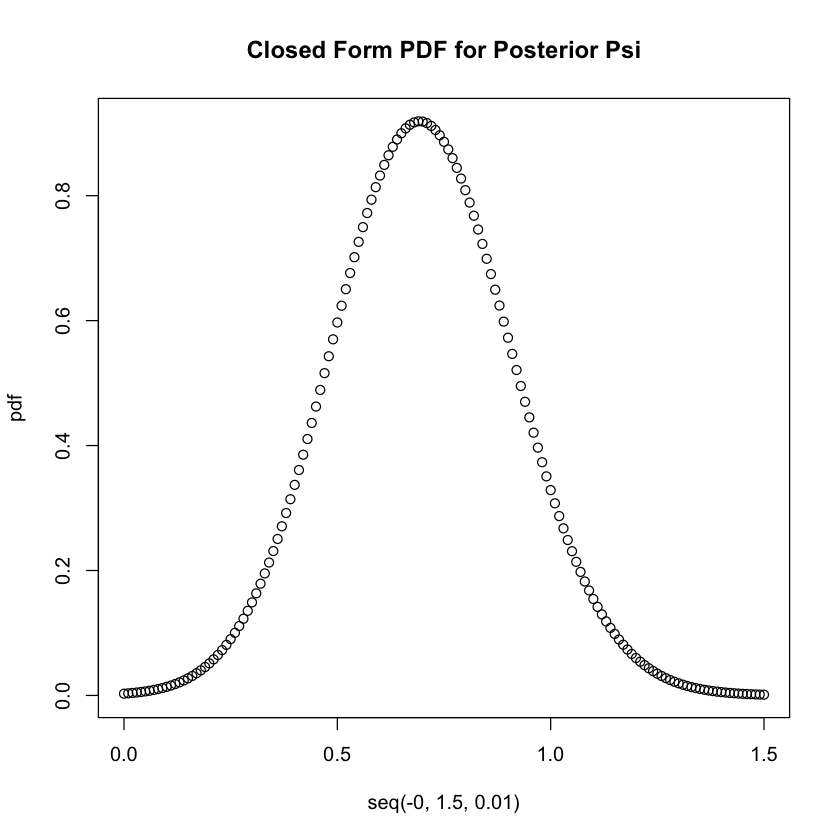

In [29]:
plot(x = seq(-0, 1.5, 0.01), y = pdf, main = "Closed Form PDF for Posterior Psi")

#### 2. Simulation Approach

1. Draw $P_1,...,P_B \sim Beta(s+1, n-s+1)$
2. Let $\psi_i = log(P_i / (1 - P_i))$ for $ i = 1,...,B.$
Now $\psi_1,...,\psi_B$ are IID draws from $h(\psi|x_1,...,x_n).$
3. Plot the histogram for $\psi.$

In [37]:
B <- 200000
p <- rbeta(B, s+1, n-s+1)
psi <- log(p/(1-p))

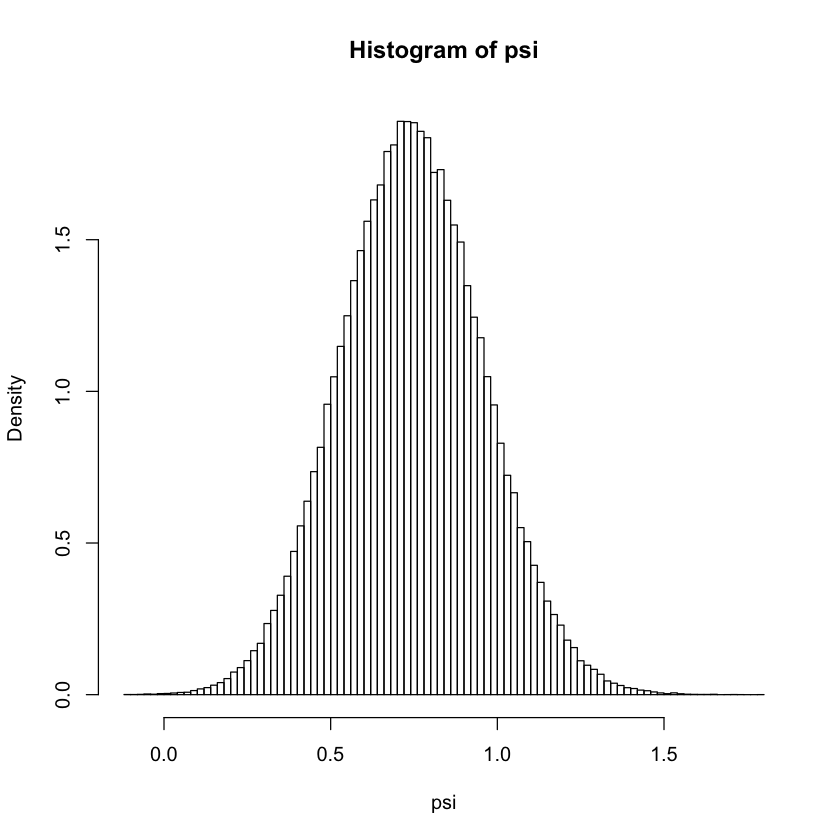

In [43]:
hist(psi, breaks = 100, freq = FALSE)

#### 3. Comparison

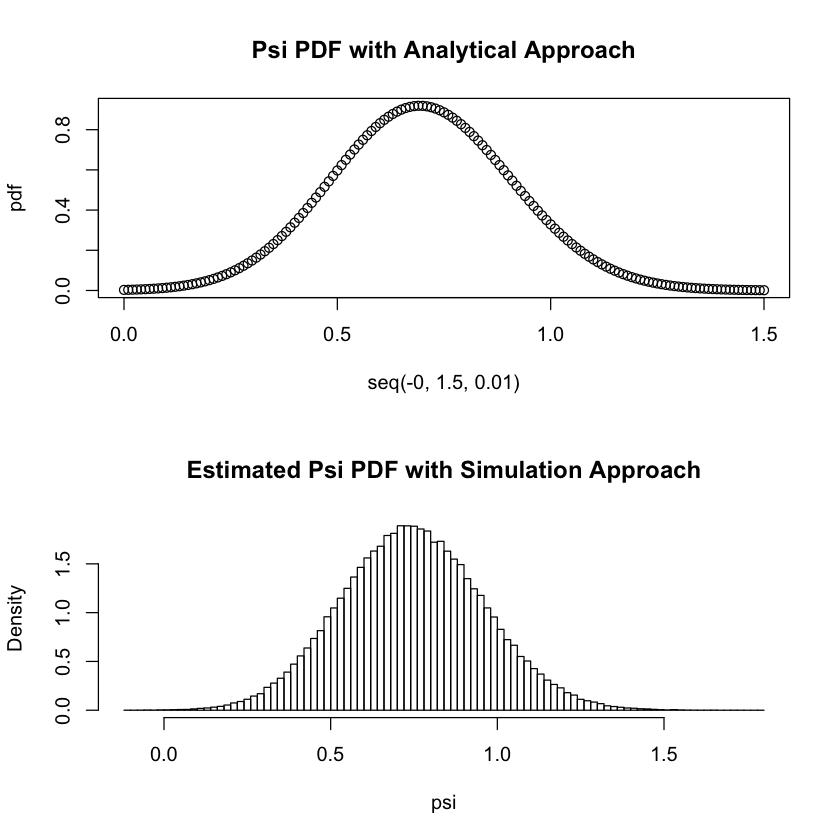

In [44]:
par(mfrow=c(2,1))
plot(x = seq(-0, 1.5, 0.01), y = pdf, main = "Psi PDF with Analytical Approach")
hist(psi, breaks = 100, probability = TRUE, main = "Estimated Psi PDF with Simulation Approach")